In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

# Load data
directory = "batch_size/augment/input"

df_training     = pd.read_csv(os.path.join("/home/tvanhout/oxides_ML/models", directory , "training.csv"))
df_train_set    = pd.read_csv(os.path.join("/home/tvanhout/oxides_ML/models", directory , "train_set.csv")) 
df_test_set     = pd.read_csv(os.path.join("/home/tvanhout/oxides_ML/models", directory , "test_set.csv"))
df_val_set      = pd.read_csv(os.path.join("/home/tvanhout/oxides_ML/models", directory , "validation_set.csv"))
df_uq           = pd.read_csv(os.path.join("/home/tvanhout/oxides_ML/models", directory , "uq.csv"))

## Performance metrics

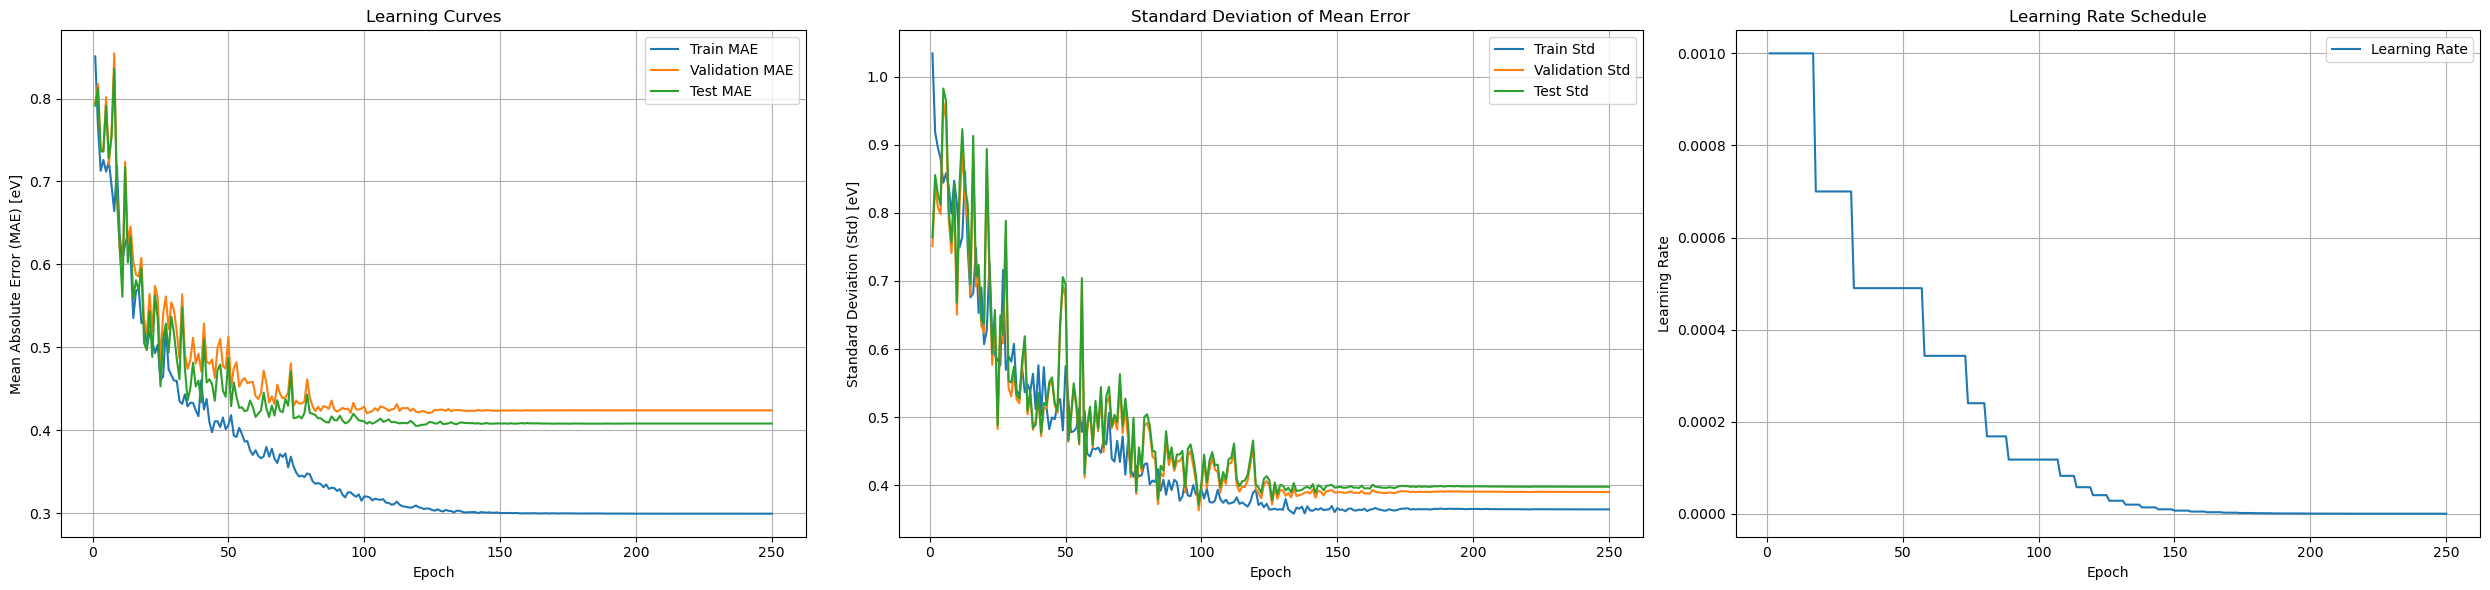

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# Learning Curves (Train, Val, Test MAE)
axs[0].plot(df_training['Epoch'], df_training['Train_MAE_eV'], label='Train MAE')
axs[0].plot(df_training['Epoch'], df_training['Val_MAE_eV'], label='Validation MAE')
axs[0].plot(df_training['Epoch'], df_training['Test_MAE_eV'], label='Test MAE')

axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Mean Absolute Error (MAE) [eV]')
axs[0].set_title('Learning Curves')
axs[0].legend()
axs[0].grid(True)

# Standard Deviation of Predictions (Train, Val, Test Std)
axs[1].plot(df_training['Epoch'], df_training['Train_std_eV'], label='Train Std')
axs[1].plot(df_training['Epoch'], df_training['Val_std_eV'], label='Validation Std')
axs[1].plot(df_training['Epoch'], df_training['Test_std_eV'], label='Test Std')

axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Standard Deviation (Std) [eV]')
axs[1].set_title('Standard Deviation of Mean Error')
axs[1].legend()
axs[1].grid(True)

# Learning Rate Schedule
axs[2].plot(df_training['Epoch'], df_training['Learning_Rate'], label='Learning Rate')

axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('Learning Rate')
axs[2].set_title('Learning Rate Schedule')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


##  Evaluation of the test set

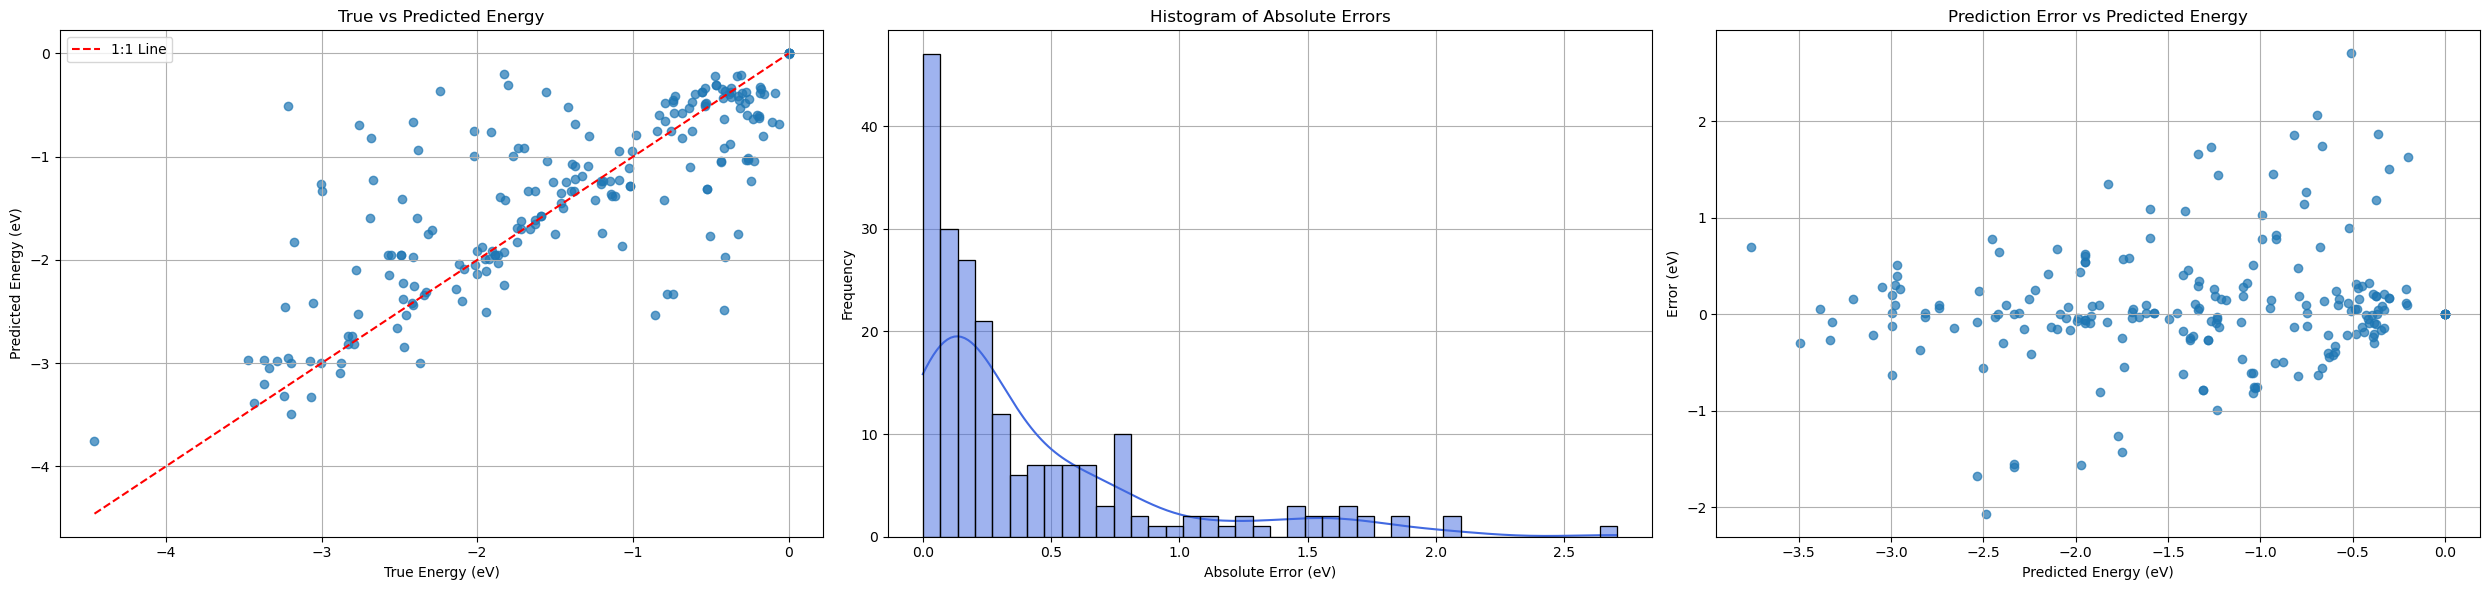

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))  

# True vs. Predicted Energy Plot
axes[0].scatter(df_test_set['True_eV'], df_test_set['Prediction_eV'], alpha=0.7)
axes[0].plot([min(df_test_set['True_eV']), max(df_test_set['True_eV'])], 
             [min(df_test_set['True_eV']), max(df_test_set['True_eV'])], 
             'r--', label='1:1 Line')
axes[0].set_xlabel('True Energy (eV)')
axes[0].set_ylabel('Predicted Energy (eV)')
axes[0].set_title('True vs Predicted Energy')
axes[0].legend()
axes[0].grid(True)

# Histogram of Absolute Errors
sns.histplot(df_test_set['Abs_error_eV'], bins=40, kde=True, color='royalblue', ax=axes[1], zorder = 10)
axes[1].set_xlabel('Absolute Error (eV)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Absolute Errors')
axes[1].grid(True)

# Prediction Error vs. Predicted Energy
axes[2].scatter(df_test_set['Prediction_eV'], df_test_set['Error_eV'], alpha=0.7)
axes[2].set_xlabel('Predicted Energy (eV)')
axes[2].set_ylabel('Error (eV)')
axes[2].set_title('Prediction Error vs Predicted Energy')
axes[2].grid(True)

plt.tight_layout()
plt.show()


## Uncertainty quantification

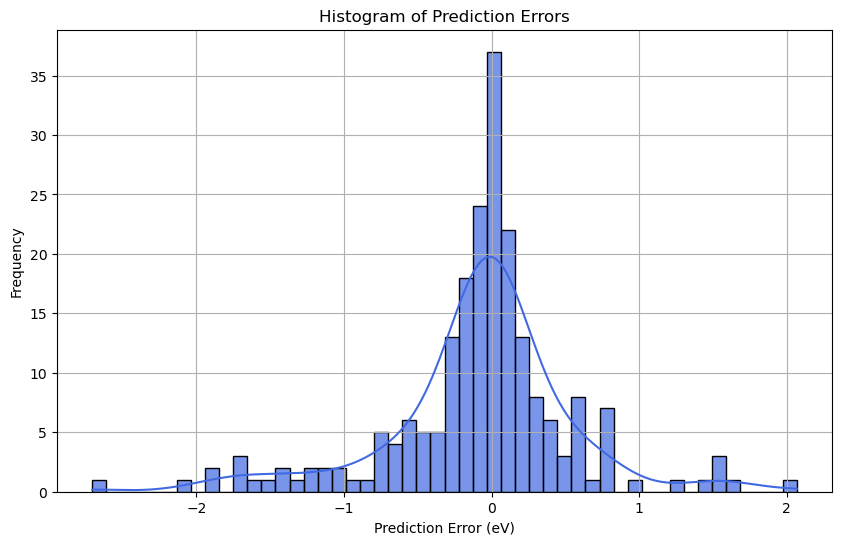

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df_uq['error'], bins=50, kde = True, color='royalblue', alpha=0.7)

plt.xlabel('Prediction Error (eV)')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.grid(True)
plt.show()


## Evaluation of test set per Molecule Group

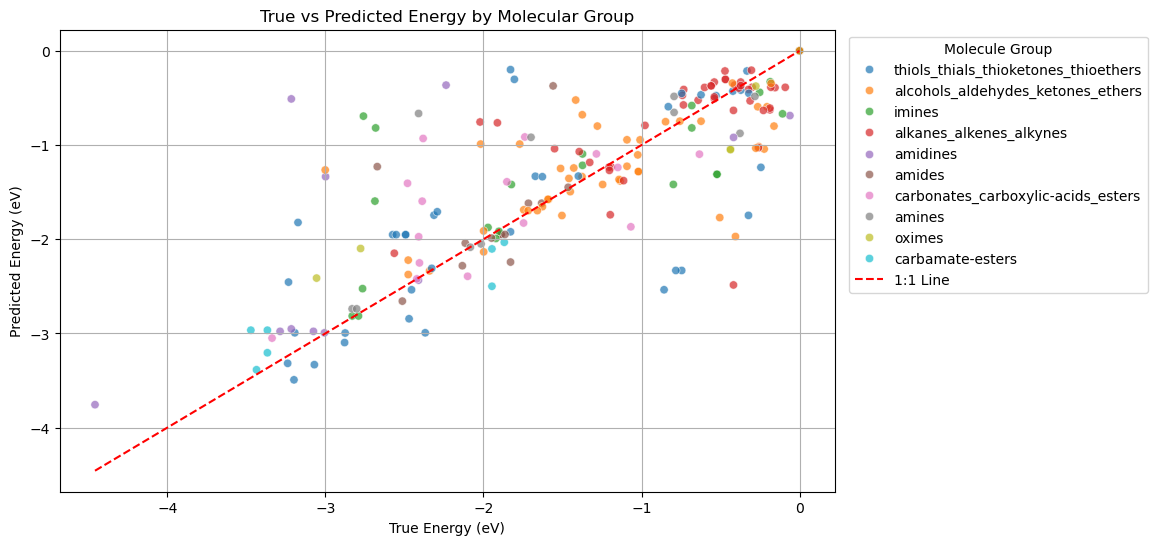

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_test_set, x='True_eV', y='Prediction_eV', hue='Molecule Group', alpha=0.7)
plt.plot([df_test_set['True_eV'].min(), df_test_set['True_eV'].max()], 
         [df_test_set['True_eV'].min(), df_test_set['True_eV'].max()], 
         'r--', label='1:1 Line')

plt.xlabel('True Energy (eV)')
plt.ylabel('Predicted Energy (eV)')
plt.title('True vs Predicted Energy by Molecular Group')
plt.legend(title="Molecule Group", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True)

plt.show()


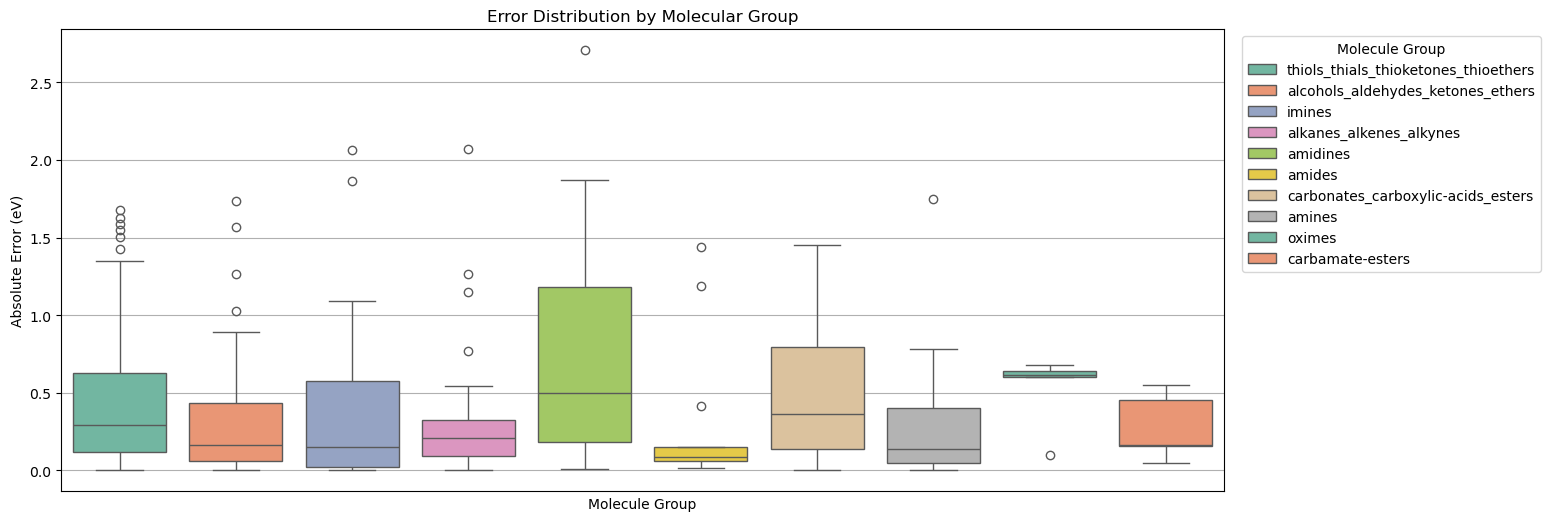

In [33]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_test_set, x='Molecule Group', y='Abs_error_eV', hue='Molecule Group', palette="Set2",legend=True)

plt.xlabel('Molecule Group')
plt.ylabel('Absolute Error (eV)')
plt.title('Error Distribution by Molecular Group')
#plt.xticks(rotation=45)
plt.xticks([])
plt.legend(title="Molecule Group", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True)
plt.show()


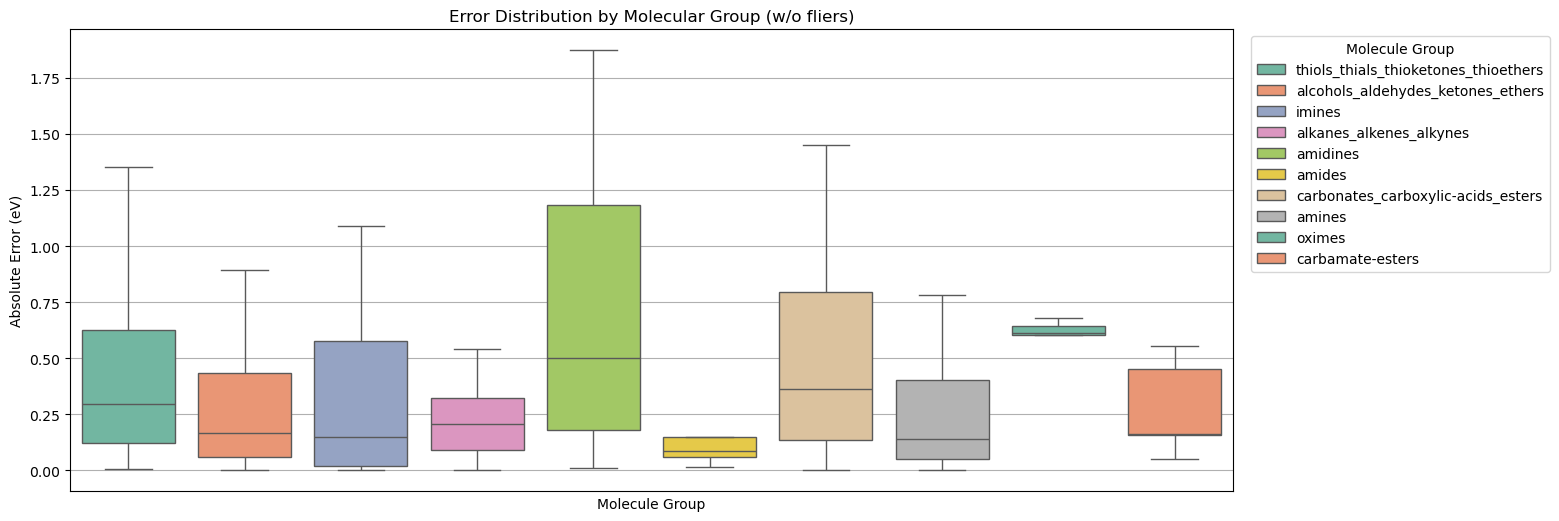

In [34]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_test_set, x='Molecule Group', y='Abs_error_eV', hue='Molecule Group', palette="Set2",legend=True, showfliers=False)

plt.xlabel('Molecule Group')
plt.ylabel('Absolute Error (eV)')
plt.title('Error Distribution by Molecular Group (w/o fliers)')
#plt.xticks(rotation=45)
plt.xticks([])
plt.legend(title="Molecule Group", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True)
plt.show()


## Uncertainty Qualification per Molecule Group

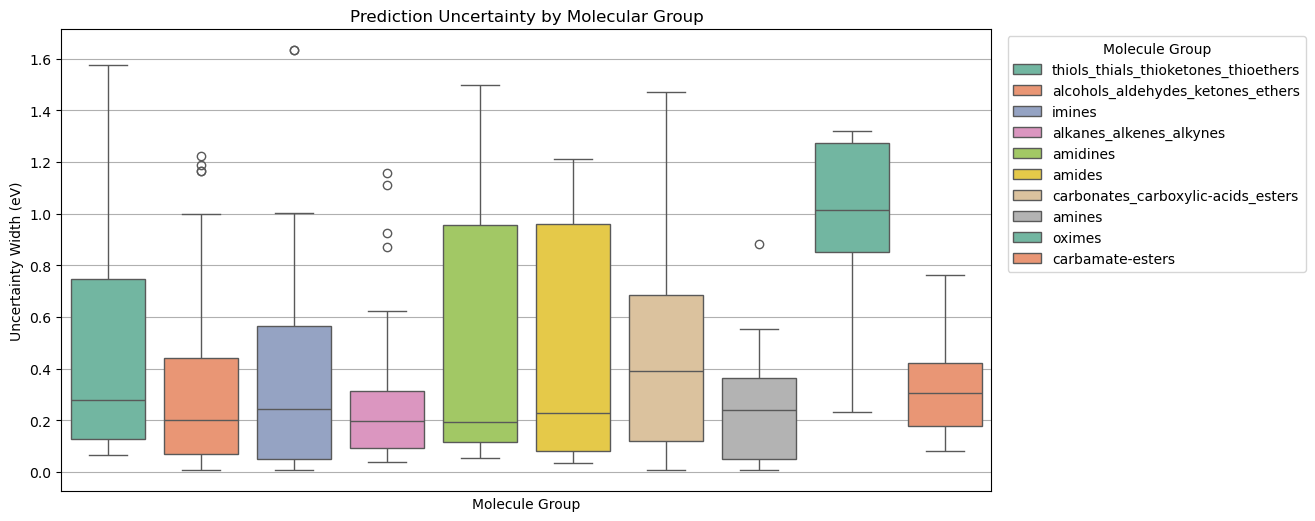

In [35]:
df_uq['uncertainty_width'] = df_uq['y_std']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_uq, x='molecule_group', y='uncertainty_width', hue='molecule_group', palette="Set2", legend=True)

plt.xlabel('Molecule Group')
plt.ylabel('Uncertainty Width (eV)')
plt.title('Prediction Uncertainty by Molecular Group')
#plt.xticks(rotation=45)
plt.xticks([])
plt.legend(title="Molecule Group", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True)
plt.show()


In [42]:
df_uq.sort_values(["y_true"], ascending=True).head(15)

,formula,material,surface,molecule_group,molecule,y_true,y_mean,error,y_std,y_min,y_max,in_interval,norm_res,uncertainty_width
11,C2H6Ir40N2O80,IrO2,110.0,amidines,Acetimidamide,-4.457949,-3.756736,-0.701212,0.191514,-4.132104,-3.381369,False,-3.661415,0.191514
84,CH3Ir40NO82,IrO2,110.0,carbamate-esters,Carbamic-acid,-3.471884,-2.965799,-0.506085,0.136516,-3.233370,-2.698227,False,-3.707141,0.136516
68,CH3Ir40NO82,IrO2,110.0,carbamate-esters,Carbamic-acid,-3.436062,-3.385912,-0.050150,0.218855,-3.814868,-2.956957,True,-0.229146,0.218855
82,CH3Ir40NO82,IrO2,110.0,carbamate-esters,Carbamic-acid,-3.367225,-3.205577,-0.161648,0.343764,-3.879354,-2.531801,True,-0.470230,0.343764
121,CH3Ir40NO82,IrO2,110.0,carbamate-esters,Carbamic-acid,-3.367225,-2.965983,-0.401242,0.303626,-3.561089,-2.370877,True,-1.321503,0.303626
48,CH2Ir40O82,IrO2,110.0,carbonates_carboxylic-acids_esters,Formic-acid,-3.337725,-3.049824,-0.287902,0.216945,-3.475035,-2.624612,True,-1.327074,0.216945
26,C2H6Ir40N2O80,IrO2,110.0,amidines,Acetimidamide,-3.286905,-2.978180,-0.308725,0.107408,-3.188701,-2.767659,False,-2.874311,0.107408
37,C3H6Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Propane-2-thione,-3.238875,-3.317732,0.078857,0.109597,-3.532543,-3.102921,True,0.719517,0.109597
73,CH2Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Methanethial,-3.233587,-2.455382,-0.778205,1.574885,-5.542158,0.631393,True,-0.494134,1.574885
29,CH4Ir40N2O80,IrO2,110.0,amidines,Formimidamide,-3.215866,-2.952382,-0.263484,0.126158,-3.199652,-2.705112,False,-2.088516,0.126158


In [46]:
df_uq.sort_values(["y_std"], ascending=False).head(20)

,formula,material,surface,molecule_group,molecule,y_true,y_mean,error,y_std,y_min,y_max,in_interval,norm_res,uncertainty_width
57,CH3Ir40NO80,IrO2,110.0,imines,Methanimine,-0.522336,-1.310681,0.788345,1.632350,-4.510086,1.888724,True,0.482951,1.632350
198,CH3Ir40NO80,IrO2,110.0,imines,Methanimine,-0.522336,-1.310681,0.788345,1.632350,-4.510086,1.888724,True,0.482951,1.632350
73,CH2Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Methanethial,-3.233587,-2.455382,-0.778205,1.574885,-5.542158,0.631393,True,-0.494134,1.574885
118,C2H6Ir40N2O80,IrO2,110.0,amidines,Acetimidamide,-2.998858,-1.335558,-1.663300,1.500102,-4.275758,1.604641,True,-1.108791,1.500102
180,C2H4Ir40O82,IrO2,110.0,carbonates_carboxylic-acids_esters,Acetic-acid,-1.285345,-1.094085,-0.191260,1.472108,-3.979416,1.791246,True,-0.129923,1.472108
22,C2H6Ir40N2O80,IrO2,110.0,amidines,Acetimidamide,-0.060982,-0.687260,0.626277,1.433066,-3.496068,2.121550,True,0.437019,1.433066
167,CH3Ir40NO81,IrO2,110.0,oximes,Formaldoxime,-0.437293,-1.042142,0.604848,1.319958,-3.629259,1.544976,True,0.458233,1.319958
85,CH4Ir40N2O80,IrO2,110.0,amidines,Formimidamide,-3.215866,-0.510332,-2.705534,1.319248,-3.096058,2.075394,False,-2.050815,1.319248
92,CH3Ir40NO81,IrO2,110.0,oximes,Formaldoxime,-2.777391,-2.098651,-0.678741,1.272749,-4.593239,0.395938,True,-0.533287,1.272749
112,CH2Ir40O82,IrO2,110.0,carbonates_carboxylic-acids_esters,Formic-acid,-2.381773,-0.930309,-1.451464,1.229596,-3.340317,1.479700,True,-1.180440,1.229596


In [49]:
df_uq.sort_values(["error"], ascending=True).head(15)

,formula,material,surface,molecule_group,molecule,y_true,y_mean,error,y_std,y_min,y_max,in_interval,norm_res,uncertainty_width
85,CH4Ir40N2O80,IrO2,110.0,amidines,Formimidamide,-3.215866,-0.510332,-2.705534,1.319248,-3.096058,2.075394,False,-2.050815,1.319248
94,CH3Ir40NO80,IrO2,110.0,imines,Methanimine,-2.759550,-0.693176,-2.066374,1.003106,-2.659265,1.272913,False,-2.059975,1.003106
122,C2H6N2O80Ru40,RuO2,110.0,amidines,Acetimidamide,-2.236639,-0.363873,-1.872766,0.458941,-1.263397,0.535652,False,-4.080625,0.458941
127,C2H5Ir40NO80,IrO2,110.0,imines,N-methylmethanimine,-2.682220,-0.818345,-1.863875,0.855577,-2.495276,0.858586,False,-2.178501,0.855577
203,C3H9Ir40NO80,IrO2,110.0,amines,Trimethylamine,-2.410489,-0.665060,-1.745429,0.551805,-1.746597,0.416477,False,-3.163128,0.551805
192,C2H6Ir40O81,IrO2,110.0,alcohols_aldehydes_ketones_ethers,Ethanol,-3.001320,-1.264689,-1.736631,0.998242,-3.221244,0.691865,True,-1.739689,0.998242
118,C2H6Ir40N2O80,IrO2,110.0,amidines,Acetimidamide,-2.998858,-1.335558,-1.663300,1.500102,-4.275758,1.604641,True,-1.108791,1.500102
56,C3H6O80Ru40S,RuO2,110.0,thiols_thials_thioketones_thioethers,Propane-2-thione,-1.828782,-0.199596,-1.629186,0.175971,-0.544500,0.145308,False,-9.258247,0.175971
75,C2H6O80Ru40S,RuO2,110.0,thiols_thials_thioketones_thioethers,Dimethylsulfane,-1.804526,-0.302689,-1.501837,0.090706,-0.480472,-0.124906,False,-16.557251,0.090706
112,CH2Ir40O82,IrO2,110.0,carbonates_carboxylic-acids_esters,Formic-acid,-2.381773,-0.930309,-1.451464,1.229596,-3.340317,1.479700,True,-1.180440,1.229596


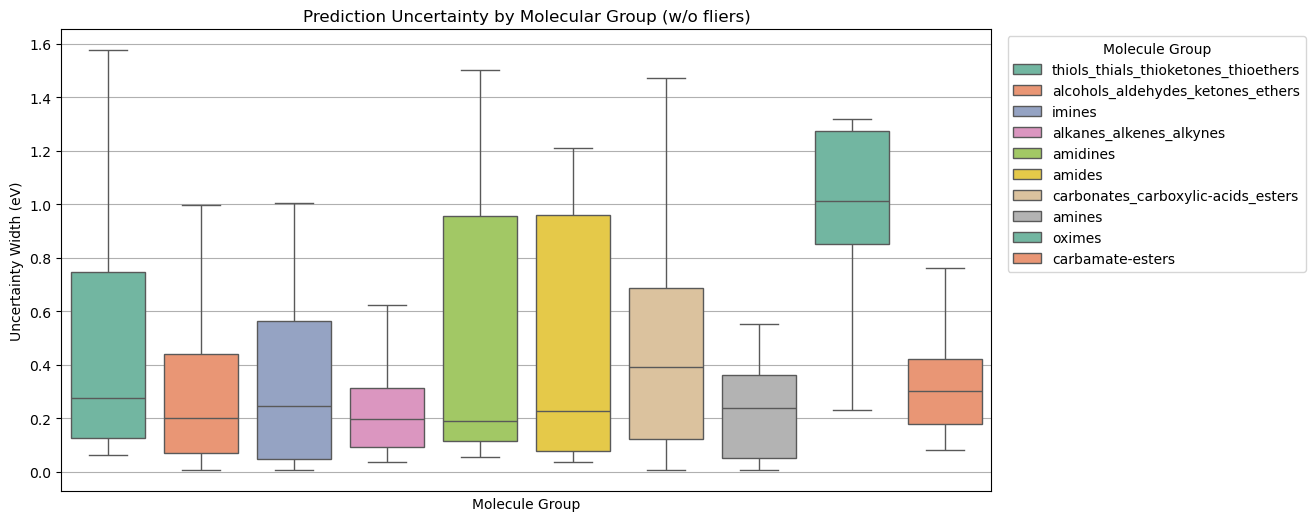

In [39]:
df_uq['uncertainty_width'] = df_uq['y_std']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_uq, x='molecule_group', y='uncertainty_width', hue='molecule_group', palette="Set2", legend=True, showfliers=False)

plt.xlabel('Molecule Group')
plt.ylabel('Uncertainty Width (eV)')
plt.title('Prediction Uncertainty by Molecular Group (w/o fliers)')
#plt.xticks(rotation=45)
plt.xticks([])
plt.legend(title="Molecule Group", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True)
plt.show()